In [1]:
import matplotlib.pyplot as plt
import numpy as np
import typy
import pandas as pd

In [2]:
# #Location of data files
file_path = f"./data/"
# Model generation
model = typy.model(file_path,nscf="nscf.out",hr="wannier_hr.dat")

In [3]:
# Define hexagonal mesh
hexagon=typy.hexagon_cartesian(150).T
hx,hy = hexagon.T
inv_g = np.linalg.inv(typy.g_vec)
inv_h = np.dot(hexagon,inv_g)

In [4]:
#Calculate band structure
band_mesh = np.array(model.calculate_energy(inv_h))
band_index = 6
fs = band_mesh[band_index]

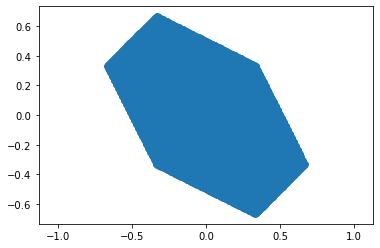

In [5]:
plt.scatter(inv_h.T[0],inv_h.T[1])
plt.axis("equal")
plt.show()

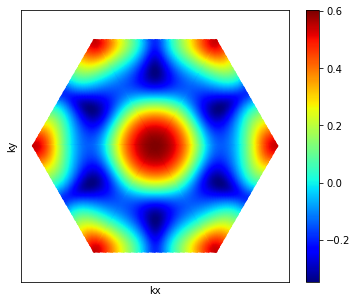

In [6]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hx,hy,c=fs,cmap='jet',s=4)
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.xlabel("kx")
plt.ylabel("ky")
plt.axis("equal")
# plt.savefig("hexagon_electron.png")
plt.show()

In [7]:
hexagon_3d = np.c_[inv_h,np.zeros(inv_h.T.shape[1])]

In [8]:
np.savetxt("hex.mesh",hexagon_3d,fmt="%1.8f")

In [9]:
hexagon_3d.shape

(58128, 3)

In [10]:
df_3d = pd.DataFrame()
df_3d['x']=hexagon_3d.T[0]
df_3d['y']=hexagon_3d.T[1]
df_3d['z']=hexagon_3d.T[2]

In [11]:
high_temp = np.loadtxt("/work/bansil/s.sevim/0_NbSe2_Work/0.05/0.05.freq.gp")/8

In [7]:
r_space = np.linspace(0.6,0,100,endpoint=False)
theta_space = np.linspace(0,2*np.pi,360,endpoint=False)


In [8]:
radial_mesh = np.array([[r*np.cos(theta),r*np.sin(theta)] for r in r_space for theta in theta_space])

In [9]:
radial_3d = np.c_[radial_mesh,np.zeros(radial_mesh.T.shape[1]),np.ones(radial_mesh.T.shape[1])/radial_mesh.T.shape[1]]

In [34]:
np.savetxt("radial.mesh",radial_3d,fmt="%1.8f")

In [10]:
radial_3d.shape

(36000, 4)

In [11]:
rx,ry= radial_mesh.T

In [13]:
low_temp = np.loadtxt("/work/bansil/s.sevim/0_NbSe2_Work/0.00565/0-0.00565.freq.gp")/8

In [14]:
directory = "/scratch/s.sevim/0_NbSe2_Work/0.00565/"

In [15]:
low_temp = np.loadtxt(f"{directory}/0-0.00565.freq.gp")/8

In [16]:
low_df = pd.DataFrame()
low_df['rx']=rx
low_df['ry']=ry
low_df['freq']=low_temp.T[1:][1]

ValueError: Length of values (12800) does not match length of index (36000)

In [17]:
hex_low = low_df
# hex_low = hex_low.query("ry<=-sqrt(3)/2*rx+sqrt(3)/2").query("ry>=sqrt(3)/2*rx-sqrt(3)/2").query("ry<=sqrt(3)/2*rx+sqrt(3)/2").query("ry>=-sqrt(3)/2*rx-sqrt(3)/2")

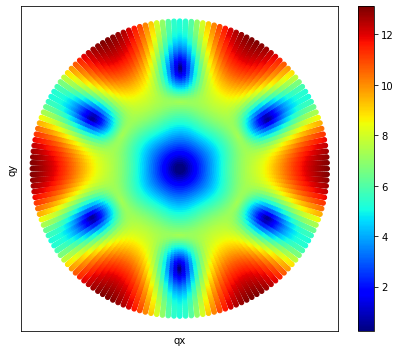

In [20]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hex_low.rx,hex_low.ry,c=hex_low.freq,s=20,cmap="jet")
plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
# plt.savefig("soften_phonon.png")
# plt.ylim(-0.5,0.5)
plt.show()

In [17]:
radial_mesh.shape

(36000, 2)

In [18]:
nk = 100*100
nq = radial_mesh.shape[0]
nph = 9

In [19]:
nq

36000

In [ ]:
print("a")

In [ ]:
epw_ph = np.zeros(shape=(nph,nk,nq))
epw_g = np.zeros(shape=(nph,nk,nq))
epw_gbar = np.zeros(shape=(nph,nq))
epw_k = np.zeros(shape=(nph,nk,nq))
epw_kq = np.zeros(shape=(nph,nk,nq))
for i in range(nph):
    epw_ph[i] = np.loadtxt(f"{directory}/results/omega/omega_{i+1}.dat").reshape(nq,nk).T
    epw_g[i] = np.loadtxt(f"{directory}/results/gkk/gkk_{i+1}.dat").reshape(nq,nk).T
    epw_gbar[i] = epw_g[i].sum(axis=0)
    epw_k[i] = np.loadtxt(f"/{directory}/results/enk/enk_{i+1}.dat").reshape(nq,nk).T
    epw_kq[i] = np.loadtxt(f"/{directory}/results/enkq/enkq_{i+1}.dat").reshape(nq,nk).T

In [47]:
epw_k.T.shape

(12800, 10000, 9)

In [ ]:
0_NbSe2_Work/0.00565/results/enk/enk_1.dat

In [ ]:
print('done')

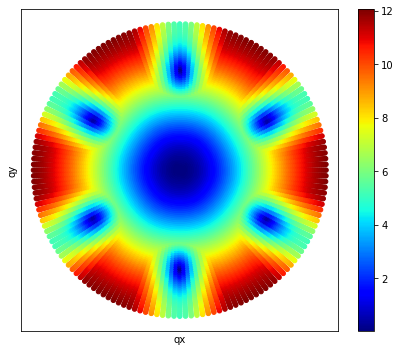

In [26]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hex_low.rx,hex_low.ry,c=epw_ph[0][0],s=20,cmap="jet")
plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
# plt.savefig("soften_phonon.png")
# plt.ylim(-0.5,0.5)
plt.show()

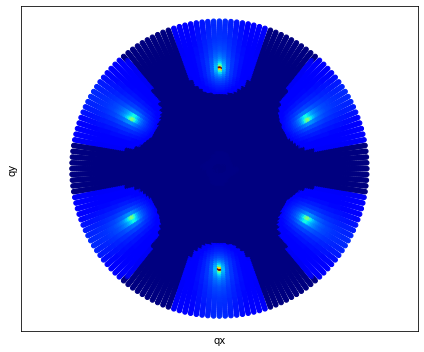

In [25]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hex_low.rx,hex_low.ry,c=epw_gbar[0],s=20,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig("gbar.png")
# plt.ylim(-0.5,0.5)
plt.show()

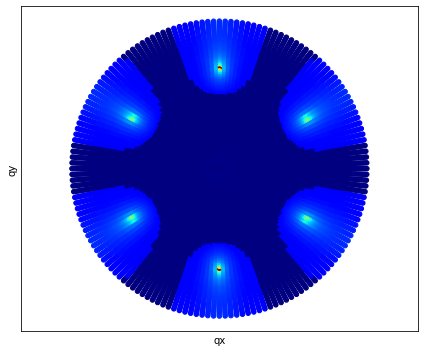

In [37]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hex_low.rx,hex_low.ry,c=epw_gbar[0],s=20,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig("gbar.png")
# plt.ylim(-0.5,0.5)
plt.show()

In [26]:
epw_mesh = typy.mesh_crystal(64)
epw_kx, epw_ky = epw_mesh

In [27]:
epw_k.T.shape

(12800, 4096, 9)

In [28]:
typy.fd

<function typy.fd(E, T=0.001)>

In [29]:
epw_g[0].T.shape

(12800, 4096)

In [65]:
np.sum(epw_g[0].T[0]*epw_g[0].T[0]).shape

(576,)

In [75]:
epw_g[0].T.shape

(12800, 576)

In [37]:
epw_k.T.shape

(36000, 10000, 9)

In [30]:
selfen = np.zeros(shape=(nph,nq))
for i in range(nph):
    for j in range(nq):
        epc = (epw_g[i].T[j]*epw_g[i].T[j])*10**-6
        fsn = (typy.fd(epw_k.T[j])-typy.fd(epw_kq.T[j]))/(epw_k.T[j]-epw_kq.T[j])
        res=np.sum(epc*fsn)
        selfen[i][j]=res

/work/bansil/s.sevim/Work/typy/typy.py:157: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(E/(kb*T)))
<ipython-input-30-d75c7dba6c6b>:5: RuntimeWarning: invalid value encountered in true_divide
  fsn = (typy.fd(epw_k.T[j])-typy.fd(epw_kq.T[j]))/(epw_k.T[j]-epw_kq.T[j])


ValueError: operands could not be broadcast together with shapes (4096,) (4096,9) 

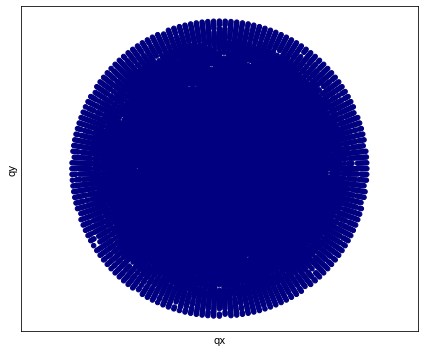

In [85]:
fig = plt.figure(figsize=(6,5))
plt.scatter(hex_low.rx,hex_low.ry,c=selfen[0],s=20,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
# plt.savefig("gbar.png")
# plt.ylim(-0.5,0.5)
plt.show()

In [68]:
epw_k.T.shape

(12800, 576)

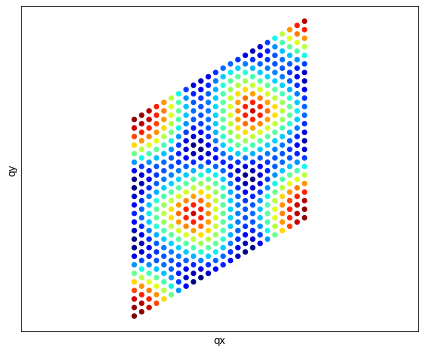

In [51]:
fig = plt.figure(figsize=(6,5))
plt.scatter(epw_kx,epw_ky,c=epw_k.T[10000],s=20,cmap="jet")
# plt.colorbar()
plt.axis('equal')
plt.xlabel("qx")
plt.ylabel("qy")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
# plt.savefig("gbar.png")
# plt.ylim(-0.5,0.5)
plt.show()

In [ ]:
selfen = np.zeros(nph,nq)
for i in range(nph):
    
    
    

In [31]:
epw_ph[0].sum(axis=0).shape

(12800,)